In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [105]:
df=pd.read_csv("D:/Dataset/Algerian_forest_fires_dataset_UPDATE.csv")

In [106]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
df.columns=df.columns.str.strip()

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [15]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [17]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [18]:
df=df.drop(df.index[[122,123]])
#droping the null value rows
df=df.drop(df[df.day == "day"].index)
#dropping categorical row

In [19]:
df.shape

(242, 14)

In [21]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [22]:
df["DC"].loc[168]=14.6
df["ISI"].loc[168]=9
df["BUI"].loc[168]=12.5
df["FWI"].loc[168]=10.4
#replacing correct values 

In [23]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6,9,12.5,10.4,NaN


In [24]:
df.fillna("fire", inplace=True)

In [25]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [26]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [21]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [27]:
df["Classes"] = df["Classes"].astype(str).str.strip()
#removing trail and previous spaces

In [28]:
df["Classes"].unique()
#checking the unique values

array(['not fire', 'fire'], dtype=object)

In [29]:
df["Classes"]=df["Classes"].apply(lambda x:1 if x=="fire" else 0)

In [30]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


In [31]:
df["Classes"].value_counts()

1    138
0    104
Name: Classes, dtype: int64

In [32]:
df.loc[:122,"Region"]=0
df.loc[122:250,"Region"]=1

In [28]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [33]:
df["day"]=df["day"].astype(int)
df["month"]=df["month"].astype(int)
df["year"]=df["year"].astype(int)
df["Temperature"]=df["Temperature"].astype(int)
df["RH"]=df["RH"].astype(int)
df["Ws"]=df["Ws"].astype(int)
df["Rain"]=df["Rain"].astype(float)
df["FFMC"]=df["FFMC"].astype(float)
df["DMC"]=df["DMC"].astype(float)
df["DC"]=df["DC"].astype(float)
df["ISI"]=df["ISI"].astype(float)
df["BUI"]=df["BUI"].astype(float)
df["FWI"]=df["FWI"].astype(float)
df["Region"]=df["Region"].astype(int)

In [34]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int32
dtype: object

In [37]:
df
#final DataFrame

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


# EDA

In [38]:
df.Classes.value_counts()

1    138
0    104
Name: Classes, dtype: int64

<AxesSubplot: xlabel='Classes', ylabel='count'>

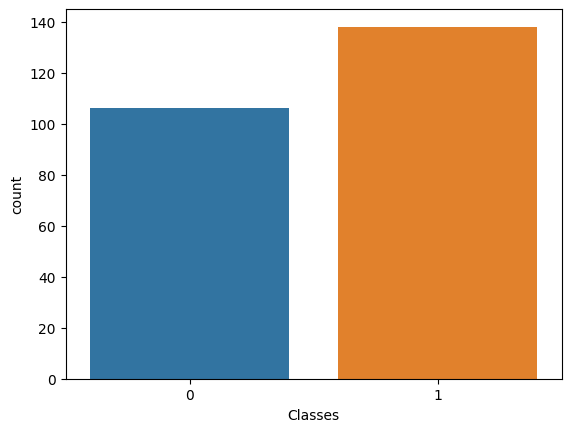

In [33]:
sns.countplot(x="Classes", data=df)

In [39]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.871901,7.512397,2012.0,32.181818,61.855372,15.528926,0.747521,78.065289,14.773140,49.629339,4.794215,16.787603,7.105785,0.570248,0.495868
std,8.765035,1.109115,0.0,3.646177,14.917190,2.808033,1.996765,14.261993,12.370047,47.667458,4.154442,14.204284,7.432767,0.496067,0.501019
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.625000,5.850000,14.625000,1.425000,6.125000,0.800000,0.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.700000,11.350000,33.250000,3.600000,12.500000,4.800000,1.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.750000,17.000000,0.475000,88.300000,20.850000,70.050000,7.300000,22.775000,11.525000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(7), int64(1)
memory usage: 31.9 KB


C:\Users\yenit\AppData\Local\Temp\ipykernel_2028\3379481623.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Rain)


<AxesSubplot: xlabel='Rain', ylabel='Density'>

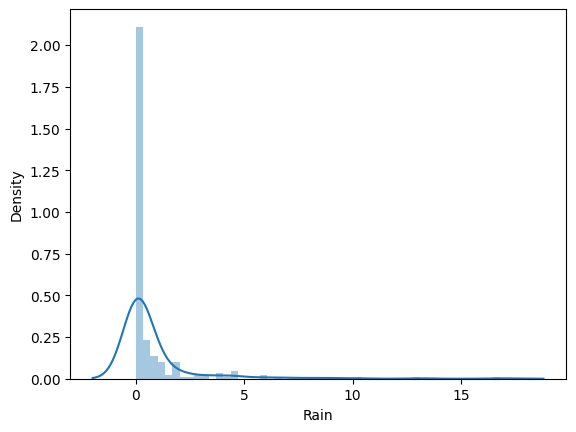

In [36]:
sns.distplot(df.Rain)

In [40]:
df.duplicated().sum()

0

In [41]:
corr_mat=df.corr()

In [42]:
df_new=df.drop(df[["day","month","year"]],axis=1)

In [43]:
corr_mat=df_new.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Temperature'),
  Text(0, 1.5, 'RH'),
  Text(0, 2.5, 'Ws'),
  Text(0, 3.5, 'Rain'),
  Text(0, 4.5, 'FFMC'),
  Text(0, 5.5, 'DMC'),
  Text(0, 6.5, 'DC'),
  Text(0, 7.5, 'ISI'),
  Text(0, 8.5, 'BUI'),
  Text(0, 9.5, 'FWI'),
  Text(0, 10.5, 'Classes'),
  Text(0, 11.5, 'Region')])

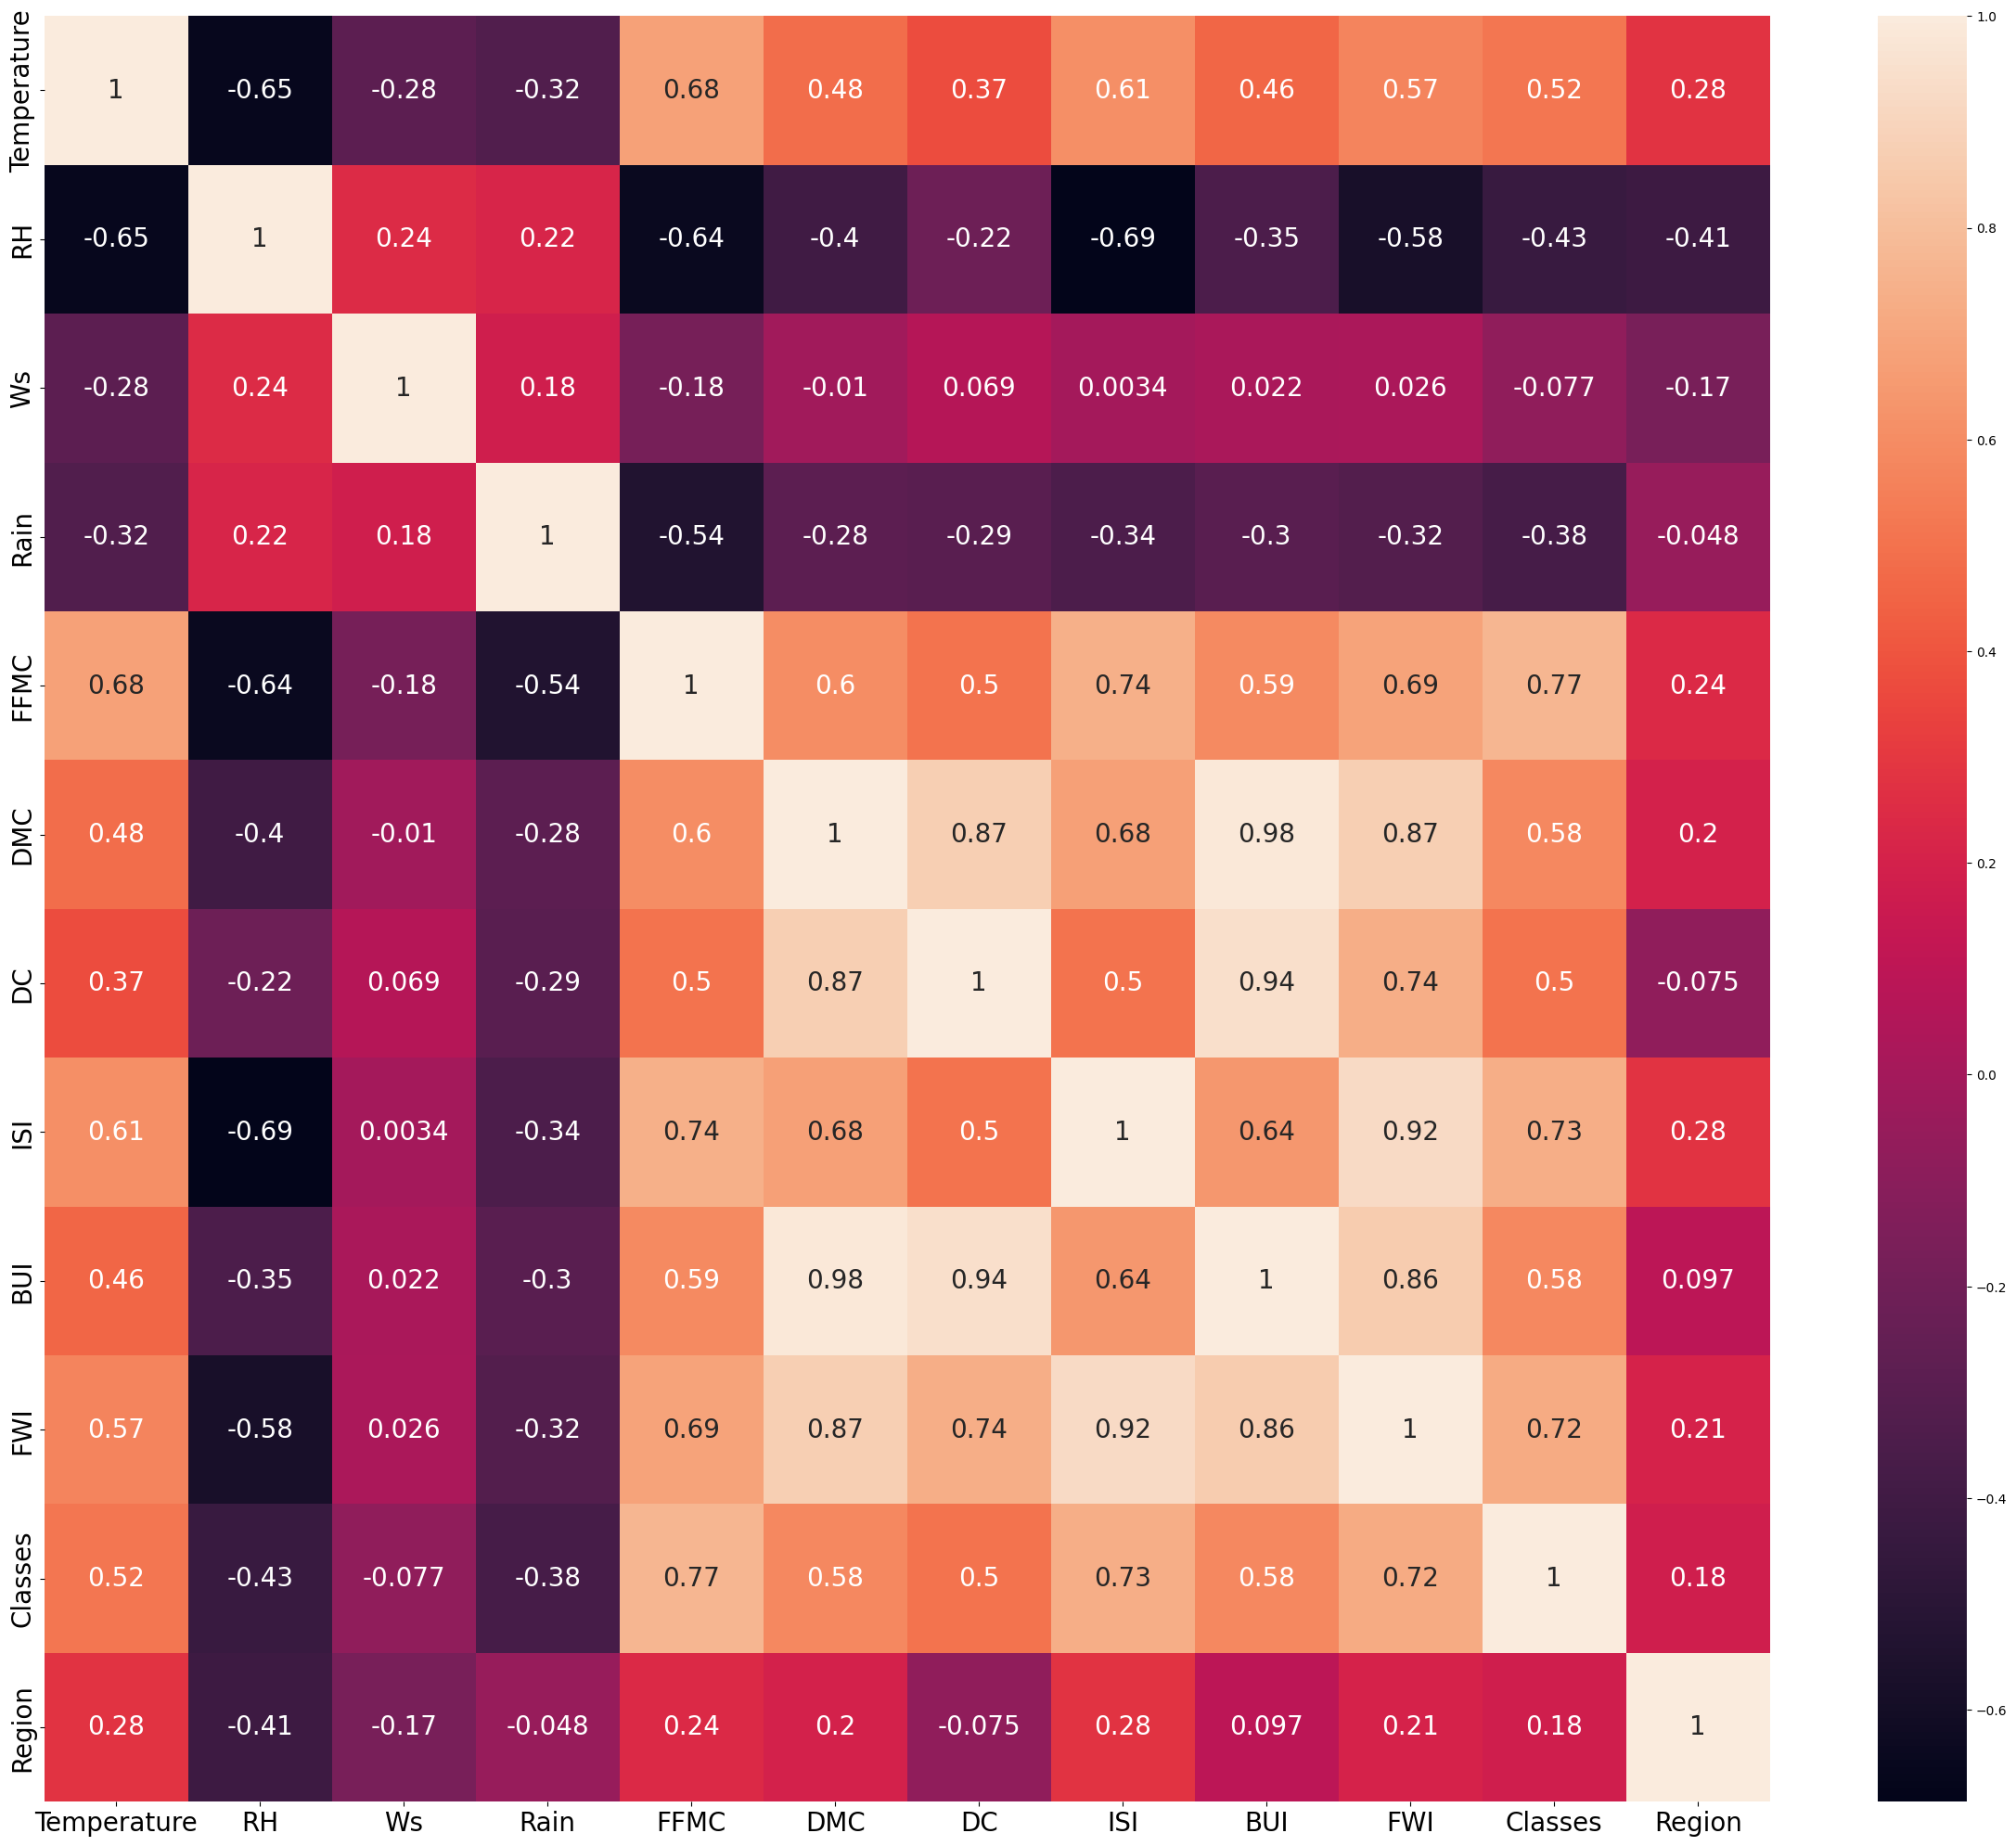

In [44]:
plt.figure(figsize=(30, 25))
annot_font_size = 20
xticklabel_font_size = 20
yticklabel_font_size = 20

sns.heatmap(corr_mat,annot=True,annot_kws={"size": annot_font_size})
plt.xticks(fontsize=xticklabel_font_size)
plt.yticks(fontsize=yticklabel_font_size)


#gives pearson values

In [42]:
df_new

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
243,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


<Figure size 3000x2500 with 0 Axes>

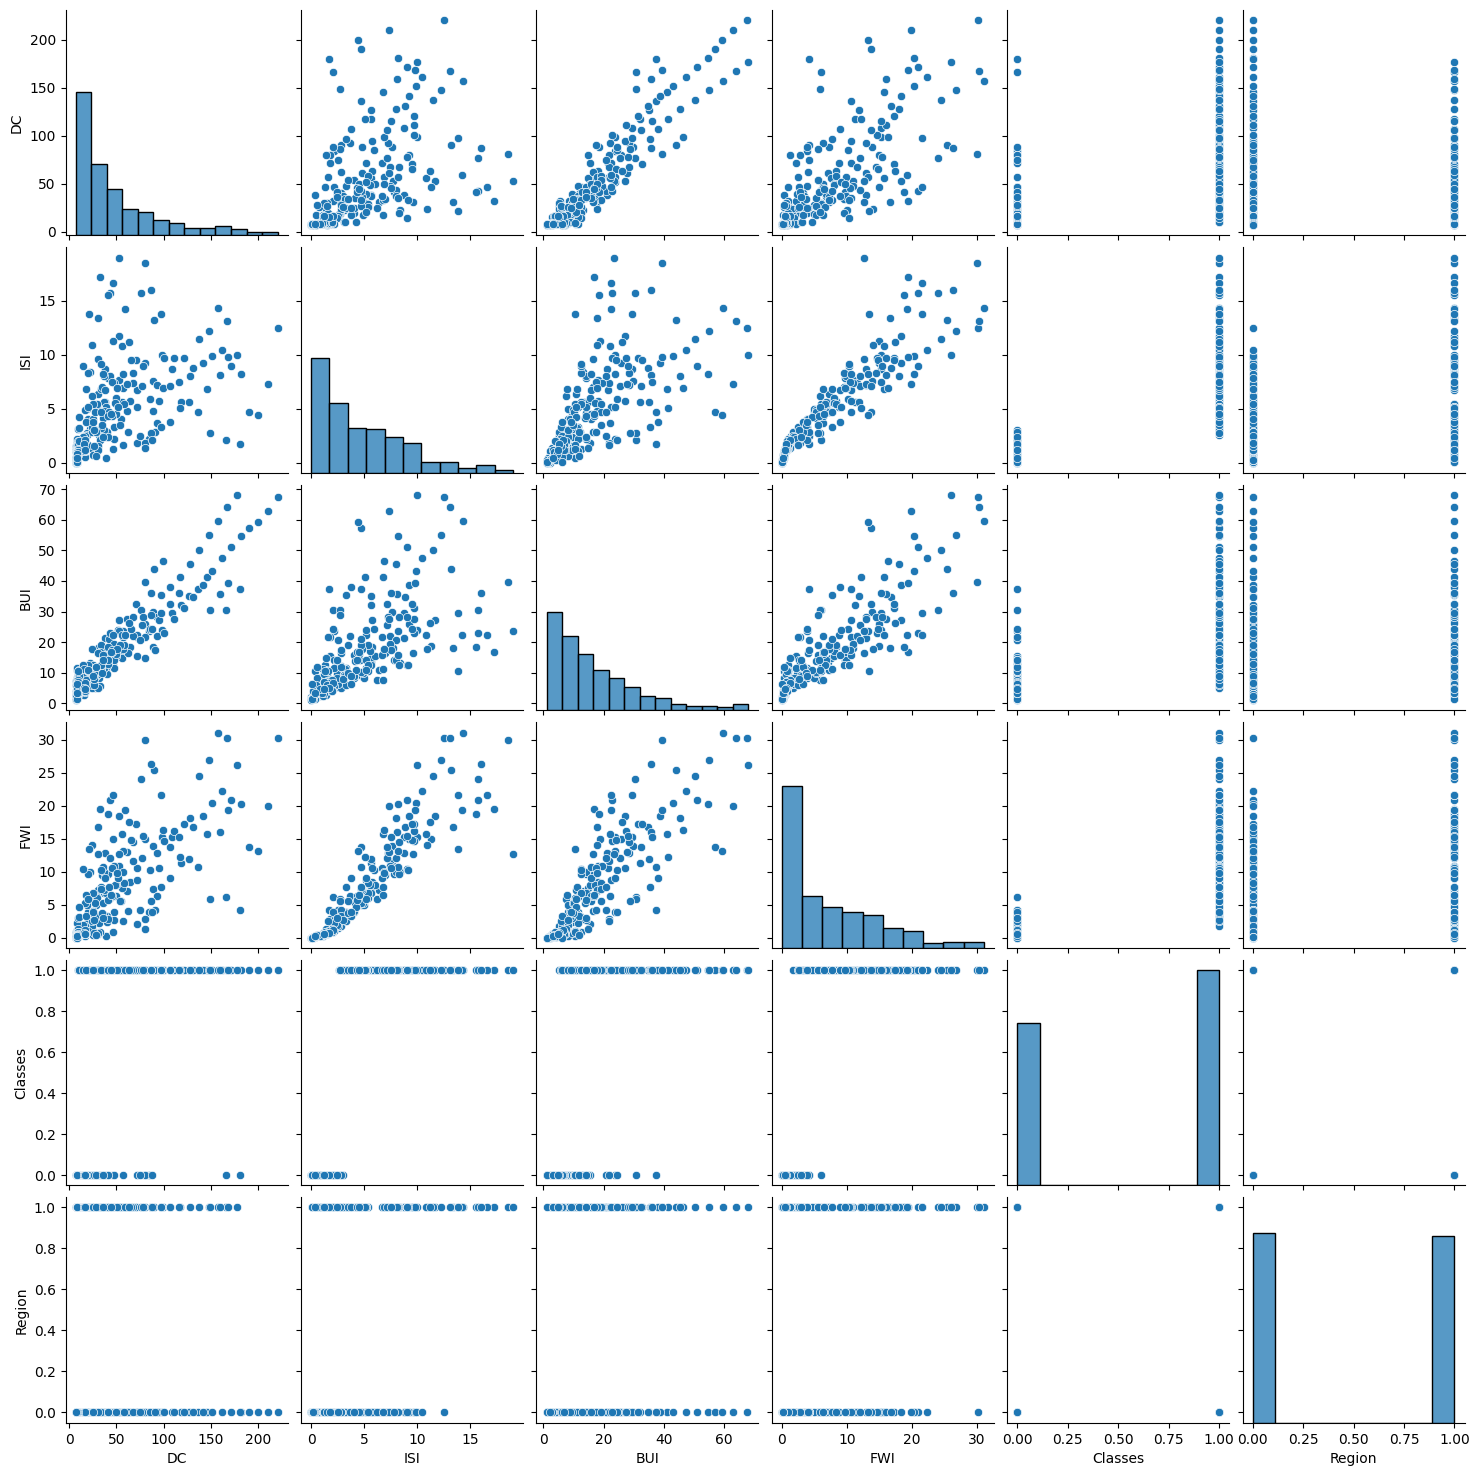

In [45]:
plt.figure(figsize=(30, 25))
annot_font_size = 20
xticklabel_font_size = 20
yticklabel_font_size = 20
sns.pairplot(df_new.iloc[:, 6:13])

In [46]:
x_train,x_test,y_train,y_test=train_test_split(df_new.drop("Classes",axis=1),df_new["Classes"],test_size=0.25)

In [47]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
103,29,88,13,0.0,71.0,2.6,16.6,1.2,3.7,0.5,0
136,27,58,17,0.0,88.9,21.3,37.8,8.7,21.2,12.9,1
65,34,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,0
113,31,50,19,0.6,77.8,10.6,41.4,2.4,12.9,2.8,0
79,35,62,19,0.0,89.4,23.2,120.9,9.7,31.3,17.2,0
...,...,...,...,...,...,...,...,...,...,...,...
183,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9,1
38,32,68,14,1.4,66.6,7.7,9.2,1.1,7.4,0.6,0
39,33,69,13,0.7,66.6,6.0,9.3,1.1,5.8,0.5,0
128,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1


In [48]:
y_train

103    0
136    1
65     1
113    0
79     1
      ..
183    1
38     0
39     0
128    0
97     0
Name: Classes, Length: 181, dtype: int64

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler=StandardScaler()

In [59]:
x_train_scaled=scaler.fit_transform(x_train)

In [60]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns = ["Temperature","RH","Ws","Rain","FFMC","DMC","DC",'ISI',"BUI","FWI","Region"])

In [61]:
x_train_scaled

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,-0.907304,1.774206,-0.925467,-0.347009,-0.513660,-0.957364,-0.694629,-0.863767,-0.905696,-0.877900,-0.99449
1,-1.451085,-0.236635,0.534311,-0.347009,0.746912,0.507550,-0.250598,0.884502,0.305122,0.740066,1.00554
2,0.452150,0.232561,-0.925467,-0.347009,0.599024,-0.291494,-0.420251,0.068643,-0.366017,-0.147206,-0.99449
3,-0.363522,-0.772859,1.264200,-0.022975,-0.034784,-0.330663,-0.175196,-0.584044,-0.269151,-0.577793,-0.99449
4,0.724040,0.031477,1.264200,-0.347009,0.782124,0.656392,1.489921,1.117605,1.003937,1.301134,-0.99449
...,...,...,...,...,...,...,...,...,...,...,...
176,0.452150,-0.169607,0.169367,-0.347009,0.690574,0.366542,-0.053716,0.581469,0.187500,0.479104,1.00554
177,-0.091632,0.433645,-0.560523,0.409071,-0.823522,-0.557842,-0.849621,-0.887078,-0.649694,-0.864852,-0.99449
178,0.180259,0.500673,-0.925467,0.031031,-0.823522,-0.691016,-0.847527,-0.887078,-0.760398,-0.877900,-0.99449
179,-0.635413,0.165533,-0.560523,-0.347009,0.077893,-0.753686,-0.719763,-0.630665,-0.774236,-0.812659,1.00554


In [62]:
x_test_scaled=scaler.transform(x_test)

In [63]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=["Temperature","RH","Ws","Rain","FFMC","DMC","DC",'ISI',"BUI","FWI","Region"])

In [64]:
x_test_scaled

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,-0.363522,0.366617,-0.560523,-0.347009,0.303247,-0.706684,-0.577338,-0.420873,-0.677370,-0.616938,-0.99449
1,-1.451085,1.506094,1.994089,0.301059,-1.992544,-0.636180,-0.686251,-1.026939,-0.698127,-0.917044,-0.99449
2,-0.091632,0.902841,-0.560523,-0.347009,0.570855,-0.142652,-0.223370,0.068643,-0.179205,-0.055869,-0.99449
3,-1.722976,1.372038,2.359034,6.727737,-2.196771,-0.965198,-0.893606,-1.073560,-0.974885,-0.930092,-0.99449
4,0.724040,-0.437719,-0.560523,-0.347009,0.746912,0.296039,0.360992,0.581469,0.353555,0.570440,-0.99449
...,...,...,...,...,...,...,...,...,...,...,...
56,-0.635413,-0.504747,-0.560523,1.327168,-0.548872,-0.299328,-0.851716,-0.840457,-0.435206,-0.838756,1.00554
57,0.995931,-0.772859,0.169367,-0.347009,0.817335,1.400600,0.444772,1.070984,1.093884,1.314183,1.00554
58,-0.907304,-0.035551,-0.925467,0.355065,-0.978452,-0.839858,-0.883133,-0.910388,-0.891858,-0.890948,-0.99449
59,0.452150,-0.839887,-0.195578,-0.347009,0.768039,0.781732,2.290016,0.744640,1.308372,1.144557,1.00554


In [65]:
x_test_scaled.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,-0.167405,0.086418,-0.010114,0.224920,-0.063876,-0.014872,-0.011243,-0.102936,-0.000673,-0.063356,-0.010869
std,0.953727,0.996632,1.096096,1.271119,1.015924,0.868893,0.993465,0.861503,0.928938,0.870794,1.008179
min,-2.810539,-2.381531,-2.750190,-0.347009,-2.619309,-1.074871,-0.895700,-1.120180,-1.050994,-0.943140,-0.994490
25%,-0.635413,-0.638803,-0.560523,-0.347009,-0.605210,-0.659681,-0.837055,-0.840457,-0.698127,-0.851804,-0.994490
50%,-0.091632,0.165533,-0.195578,-0.347009,0.394797,-0.299328,-0.470519,-0.327631,-0.372936,-0.264639,-0.994490
75%,0.452150,0.969869,0.534311,0.247054,0.669447,0.632891,0.444772,0.488228,0.713341,0.609585,1.005540
max,2.083494,1.707178,3.818812,6.727737,1.099027,2.450325,2.949779,2.166566,2.789029,2.253646,1.005540


# Logistic Regression

In [66]:
log_reg = LogisticRegression()

log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [67]:
log_reg.score(x_train_scaled,y_train)

0.9779005524861878

In [68]:
y_pred = log_reg.predict(x_test_scaled)

In [69]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [70]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

In [71]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[26,  0],
       [ 0, 35]], dtype=int64)

In [72]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [73]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

1.0

In [74]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [75]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [76]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

1.0

### AOC

In [77]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

1.0

### ROC

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

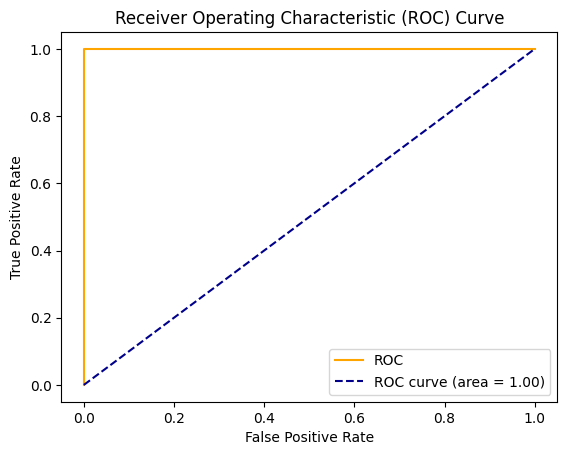

In [79]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# SVC

In [81]:
from sklearn.svm import SVC
model_svc=SVC()

In [82]:
model_svc.fit(x_train_scaled,y_train)

SVC()

In [83]:
model_svc.score(x_train_scaled,y_train)

0.9447513812154696

In [84]:
y_pred2=model_svc.predict(x_test_scaled)

In [85]:
y_pred2

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_test,y_pred2)

0.9508196721311475

# Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
model_dt=DecisionTreeClassifier()

In [95]:
model_dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [96]:
model_dt.score(x_train_scaled,y_train)

1.0

In [92]:
y_pred3=model_dt.predict(x_test_scaled)

In [93]:
y_pred3

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [94]:
accuracy_score(y_pred3,y_test)

0.9836065573770492

In [97]:
conf_mat = confusion_matrix(y_test,y_pred3)
conf_mat

array([[25,  1],
       [ 0, 35]], dtype=int64)

In [98]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [99]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9836065573770492

In [100]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9615384615384616

In [101]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [102]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9803921568627451

### In Logistic Regression we are getting the Maximum accuracy, so we are finilizing LR model.